# Amount of Trees Metric
## By: Matt McClenahan
My metric shows the amount of trees per neighborhood. Ideally, you would want to live in a neighborhood with more trees because not only will it be more appealing, you will also live in a greener neighborhood. By the end of this presentation, you will see which neighborhood I believe is the best based on the amount of trees that it has.

In [1]:
#imports all of the pandas methods that I will be using
import pandas as pd
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import pylab

#Creates a list of the key values that we are using, the neighborhoods and how many trees are in each neighborhood.
trees = pd.read_csv("trees.csv", parse_dates=True)
trees = trees["neighborhood"].value_counts().reset_index().rename({'index' : 'hood', 'neighborhood' : 'tree count'}, axis=1)
trees

,hood,tree count
0,Squirrel Hill South,2202
1,Squirrel Hill North,1499
2,South Side Flats,1355
3,Shadyside,1147
4,Bloomfield,1073
...,...,...
84,Northview Heights,4
85,Arlington Heights,4
86,Esplen,2
87,Glen Hazel,2


In [3]:
#Calculates the average amount of trees in each neighborhood.
treeMean = trees.mean()
print("The mean amount of trees is: ")
print(treeMean)

The mean amount of trees is: 
tree count    343.865169
dtype: float64


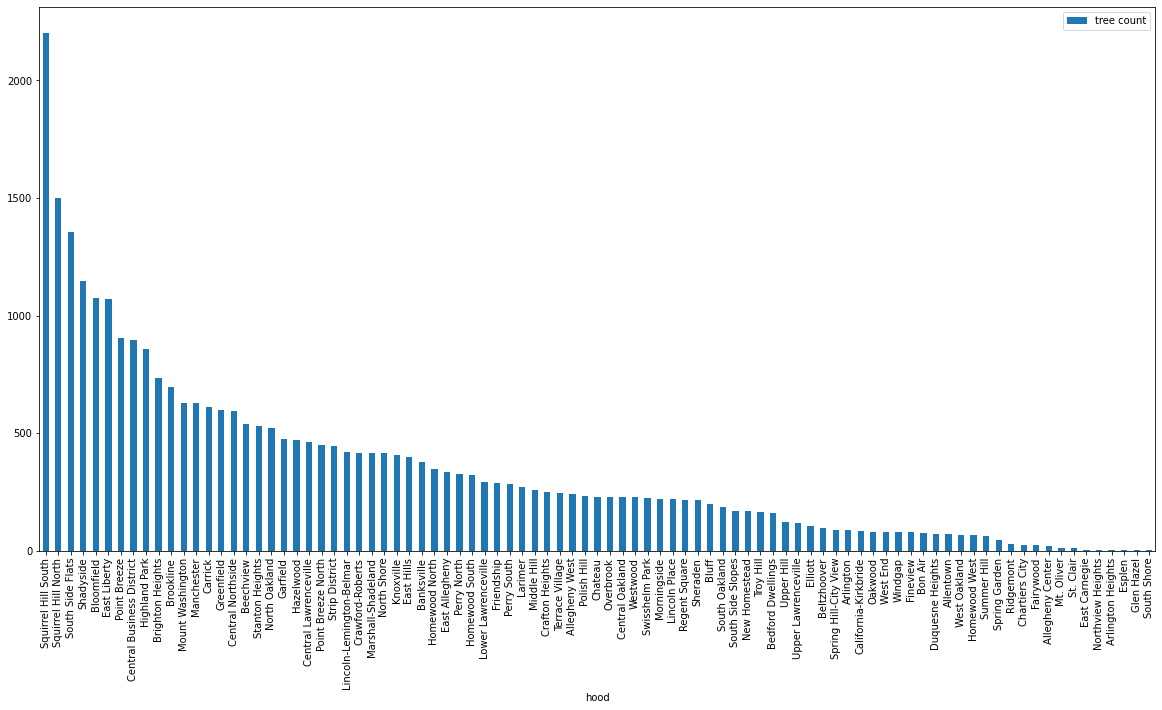

In [4]:
pylab.figure(figsize=(20, 10))
ax=pylab.gca()
trees.plot(kind='bar', x='hood', y='tree count', ax=ax)

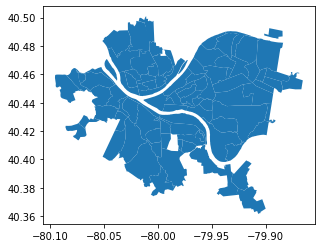

In [5]:
#imports the map with the neighborhoods in Pittsburgh. 
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
neighborhoods.plot()

In [8]:
trees

,hood,tree count
0,Squirrel Hill South,2202
1,Squirrel Hill North,1499
2,South Side Flats,1355
3,Shadyside,1147
4,Bloomfield,1073
...,...,...
84,Northview Heights,4
85,Arlington Heights,4
86,Esplen,2
87,Glen Hazel,2


In [6]:
#merges the trees dataset with my map
trees_map = neighborhoods.merge(trees, how='left', left_on='hood', right_on='hood')
trees_map.head()


,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,tree count
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",228.0
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",523.0
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",68.0
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",416.0
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",446.0


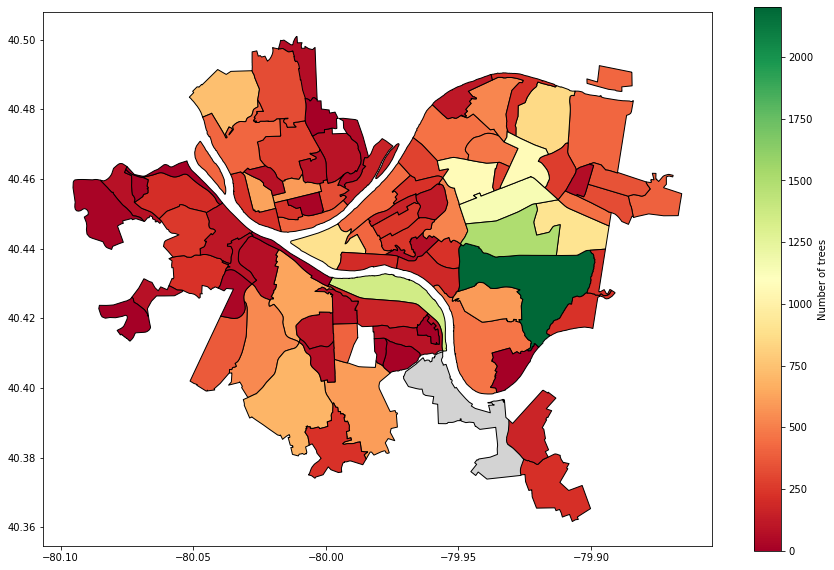

In [7]:
#creates the neighborhood plot with the merged data
trees_map.plot(column='tree count', # set the data to be used for coloring
               cmap='RdYlGn',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of trees"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               vmin=0)

According to the graph, we can see that Squirrel Hill South and Squirrel Hill North are the neighborhoods that contain the most trees. Another interesting bit of information that this graph shows is that many neighborhoods could use more trees. By planting more trees, Pittsburgh can be more appealing and better for the environment , which will attract more people here. 